# Data Visualization Final Code (Standarized)

Hello my fellow earthlings, here is the code for plotting stuff from fred.

If you need to merge datasets from outside sources with fred data, let me know, I did it already.

In [ ]:
#you might need to install some stuff
#!pip install fredapi
#!pip install seaborn

In [2]:
#then you load the installed packages into the notebook
import fredapi as fa 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mtick
import datetime
from fredapi import Fred


#import matplotlib as plt

In [3]:
#set fred key

fred = Fred("0f4d8cbe017c0f3d958eb901e613a8ad")
#e3f48ec51661cc03ebf77156093126f5

In [4]:
#now we set the key to our enviroment 

import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

# Compare 2 datapoints

In [390]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, l

#frequency = "q" or "m"
#these are things you can put inside the get_series function

data_1 = fred.get_series('DFF')
data_1.name = 'EFFR'

data_2 = fred.get_series('EFFR')
data_2.name = 'EFFR'

data_1_plot = data_1.to_frame()
data_1_plot['year'] = data_1_plot.index
data_1_plot.reset_index(drop=True, inplace=True)
data_1_plot.dropna(inplace=True)
data_1_plot['type'] = 'EFFR'

data_2_plot = data_2.to_frame()
data_2_plot['year'] = data_2_plot.index
data_2_plot.reset_index(drop=True, inplace=True)
data_2_plot.dropna(inplace=True)
data_2_plot['type'] = 'EFFR'

#in this case, we need to merge datasets to compare them both

all_dfs = [data_1_plot, data_2_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

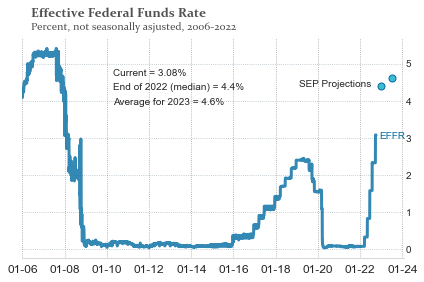

In [396]:
#two compare two values

fig, ax = plt.subplots()

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.08, y=.935, s="Effective Federal Funds Rate", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.08, y=.885, s="Percent, not seasonally asjusted, 2006-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
 
    #'#3EBCD2',

#set the lines with the dataset 
sns.lineplot(ax=ax, data=data_1_plot[data_1_plot["Year"] > '2006-01-01'], x="Year", y="Percentage", hue = "type1", palette = ['#006BA2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph
plt.figtext(.27, .73, "Current = " + str(data_1_plot["Percentage"].iloc[-1]) + "%")
plt.figtext(.27, .68, "End of 2022 (median) = " + str(4.4)+ "%")
plt.figtext(.27, .63, "Average for 2023 = " + str(4.6) + "%")

plt.figtext(.70, .69, "SEP Projections  ")


#plot grey area for recession information
#ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

#plt.ylim([12000, 27500])

#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2006-01-01"), datetime.date.fromisoformat("2024-02-01")])
plt.rcParams["figure.autolayout"] = True

plt.plot(datetime.date.fromisoformat("2022-12-31"),4.4, marker="o",markeredgecolor='#006BA2',  markersize=7, markerfacecolor="#3EBCD2")

plt.plot(datetime.date.fromisoformat("2023-06-30"),4.6, marker="o",markeredgecolor='#006BA2',  markersize=7, markerfacecolor="#3EBCD2")


#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, l

#frequency = "q" or "m"
#these are things you can put inside the get_series function

data_1 = fred.get_series('LNS12300060')
data_1.name = 'EMRATIO'

data_2 = fred.get_series('EFFR')
data_2.name = 'EMRATIO'

data_1_plot = data_1.to_frame()
data_1_plot['year'] = data_1_plot.index
data_1_plot.reset_index(drop=True, inplace=True)
data_1_plot.dropna(inplace=True)
data_1_plot['type'] = 'EMRATIO'

data_2_plot = data_2.to_frame()
data_2_plot['year'] = data_2_plot.index
data_2_plot.reset_index(drop=True, inplace=True)
data_2_plot.dropna(inplace=True)
data_2_plot['type'] = 'EMRATIO'

#in this case, we need to merge datasets to compare them both

all_dfs = [data_1_plot, data_2_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_39152/3484894377.py:78: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig('filename.png', dpi=300, bbox_inches='tight')
C:\Users\carlo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


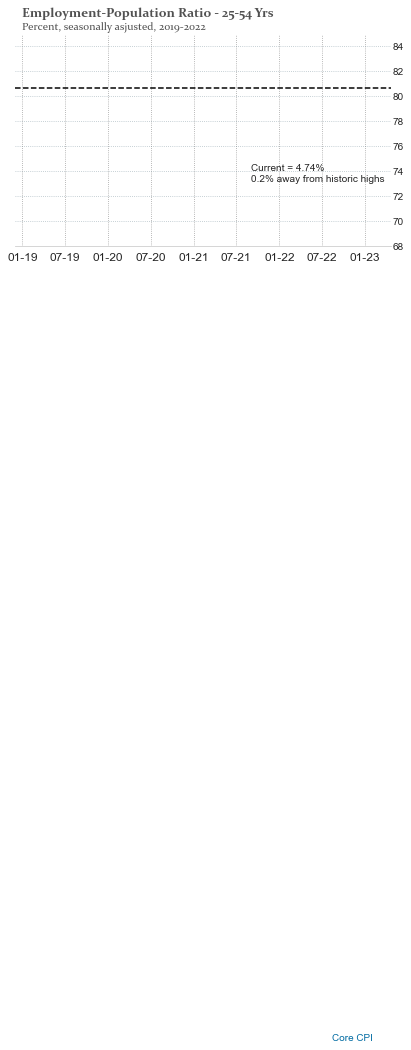

In [493]:
#two compare two values

fig, ax = plt.subplots()

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.12, y=.935, s="Employment-Population Ratio - 25-54 Yrs", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Percent, seasonally asjusted, 2019-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
 
    #'#3EBCD2',

#set the lines with the dataset 
sns.lineplot(ax=ax, data=data_1_plot[data_1_plot["Year"] > '2019-01-01'], x="Year", y="Percentage", hue = "type1", palette = ['#006BA2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -6),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph
plt.figtext(.65, .40, "Current = " + str(data_1_plot["Percentage"].iloc[-1]) + "%")
plt.figtext(.65, .36, "0.2% away from historic highs")


plt.axhline(y = 80.6, color = "black",linestyle ='--')


#plot grey area for recession information
#ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

plt.ylim([68, 85])

#note that to limit the x axis we use dates, not number as for the Y axis
#plt.xlim([datetime.date.fromisoformat("2020-01-01"), datetime.date.fromisoformat("2023-02-01")])

#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
plt.show()

In [32]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, l

#frequency = "q" or "m"
#these are things you can put inside the get_series function

data_1 = fred.get_series('WALCL')
data_1.name = 'Level'

data_2 = fred.get_series('EFFR')
data_2.name = 'Level'

data_1_plot = data_1.to_frame()
data_1_plot['year'] = data_1_plot.index
data_1_plot.reset_index(drop=True, inplace=True)
data_1_plot.dropna(inplace=True)
data_1_plot['type'] = 'Level'

data_2_plot = data_2.to_frame()
data_2_plot['year'] = data_2_plot.index
data_2_plot.reset_index(drop=True, inplace=True)
data_2_plot.dropna(inplace=True)
data_2_plot['type'] = 'Level'

#in this case, we need to merge datasets to compare them both

all_dfs = [data_1_plot, data_2_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

In [33]:
data_1_plot['Percentage'] = data_1_plot['Percentage'].div(1000000).round(2)

In [104]:
data_1_plot

,Percentage,Year,type1
0,0.72,2002-12-18,WALCL
1,0.73,2002-12-25,WALCL
2,0.73,2003-01-01,WALCL
3,0.72,2003-01-08,WALCL
4,0.72,2003-01-15,WALCL
...,...,...,...
1028,8.83,2022-08-31,WALCL
1029,8.82,2022-09-07,WALCL
1030,8.83,2022-09-14,WALCL
1031,8.82,2022-09-21,WALCL


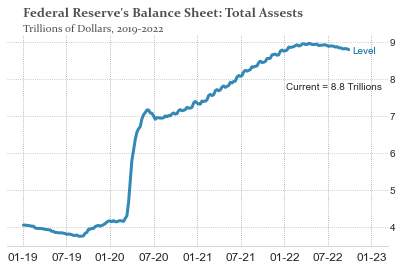

In [34]:
#two compare two values

fig, ax = plt.subplots()

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.12, y=.935, s="Federal Reserve's Balance Sheet: Total Assests", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Trillions of Dollars, 2019-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
 
    #'#3EBCD2',

#set the lines with the dataset 
sns.lineplot(ax=ax, data=data_1_plot[data_1_plot["Year"] > '2019-01-01'], x="Year", y="Percentage", hue = "type1", palette = ['#006BA2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph
plt.figtext(.73, .68, "Current = " + str(data_1_plot["Percentage"].iloc[-1]) + " Trillions")

#plot grey area for recession information
#ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

#plt.ylim([12000, 27500])

#note that to limit the x axis we use dates, not number as for the Y axis
#plt.xlim([datetime.date.fromisoformat("2020-01-01"), datetime.date.fromisoformat("2023-02-01")])

#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, l

#frequency = "q" or "m"
#these are things you can put inside the get_series function

data_1 = fred.get_series('PCETRIM12M159SFRBDAL', frequency = "m", units= "ch1")
data_1.name = 'Dallas Trimmed Mean'

data_2 = fred.get_series('PCEPI', frequency = "m",units= "ch1")
data_2.name = 'Core PCE'

data_1_plot = data_1.to_frame()
data_1_plot['year'] = data_1_plot.index
data_1_plot.reset_index(drop=True, inplace=True)
data_1_plot.dropna(inplace=True)
data_1_plot['type'] = 'Dallas Trimmed Mean'

data_2_plot = data_2.to_frame()
data_2_plot['year'] = data_2_plot.index
data_2_plot.reset_index(drop=True, inplace=True)
data_2_plot.dropna(inplace=True)
data_2_plot['type'] = 'Core PCE'

#in this case, we need to merge datasets to compare them both

all_dfs = [data_1_plot, data_2_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

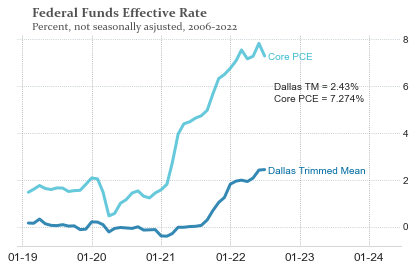

In [29]:
#two compare two values

fig, ax = plt.subplots()

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.12, y=.935, s="Federal Funds Effective Rate", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Percent, not seasonally asjusted, 2006-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
 
    #'#3EBCD2',

#set the lines with the dataset 
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2019-01-01'], x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2','#006BA2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph
plt.figtext(.68, .68, "Dallas TM = " + str(data_1_plot["Percentage"].iloc[-1]) + "%")
plt.figtext(.68, .64, "Core PCE = " + str(data_2_plot["Percentage"].iloc[-1])+ "%")


#plot grey area for recession information
#ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

#plt.ylim([12000, 27500])

#note that to limit the x axis we use dates, not number as for the Y axis
#plt.xlim([datetime.date.fromisoformat("2020-01-01"), datetime.date.fromisoformat("2023-02-01")])

#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
plt.show()

#  Now lets compare three values 

In [483]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch.

#frequency = "q" or "m"
#these are things you can put inside the get_series function

data_1 = fred.get_series('PCETRIM12M159SFRBDAL', frequency = "m")
data_1.name = 'Dallas Trimmed Mean'

data_2 = fred.get_series('PCEPILFE', frequency = "m", units = "pc1")
data_2.name = 'Core PCE'

data_3 = fred.get_series('CORESTICKM159SFRBATL', frequency = "m")
data_3.name = 'Core CPI'

data_1_plot = data_1.to_frame()
data_1_plot['year'] = data_1_plot.index
data_1_plot.reset_index(drop=True, inplace=True)
data_1_plot.dropna(inplace=True)
data_1_plot['type'] = 'Dallas Trimmed Mean'

data_2_plot = data_2.to_frame()
data_2_plot['year'] = data_2_plot.index
data_2_plot.reset_index(drop=True, inplace=True)
data_2_plot.dropna(inplace=True)
data_2_plot['type'] = 'Core PCE'

data_3_plot = data_3.to_frame()
data_3_plot['year'] = data_3_plot.index
data_3_plot.reset_index(drop=True, inplace=True)
data_3_plot.dropna(inplace=True)
data_3_plot['type'] = 'Core CPI'

#in this case, we need to merge datasets to compare them both

all_dfs = [data_1_plot, data_2_plot, data_3_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

import matplotlib
import matplotlib.pyplot as plt

In [484]:
data_2_plot

,Percentage,Year,type1
12,2.06735,1960-01-01,Core PCE
13,2.17951,1960-02-01,Core PCE
14,2.08146,1960-03-01,Core PCE
15,2.00453,1960-04-01,Core PCE
16,2.03778,1960-05-01,Core PCE
...,...,...,...
759,5.02987,2022-04-01,Core PCE
760,4.88154,2022-05-01,Core PCE
761,5.03541,2022-06-01,Core PCE
762,4.66849,2022-07-01,Core PCE


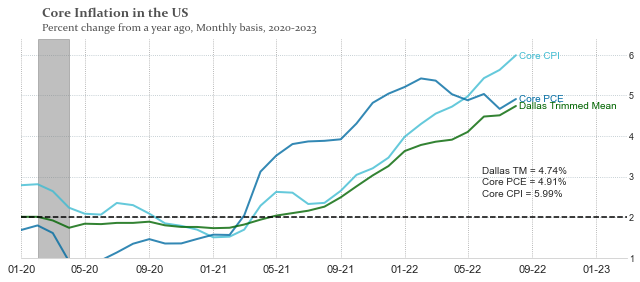

In [492]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(9,4))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.07, y=.935, s="Core Inflation in the US", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.07, y=.885, s="Percent change from a year ago, Monthly basis, 2020-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2', "#006400"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -3),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

#plt.figtext(.67, .22, "Total remains above 11 M", **hfont)


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2020-01-01"), date.fromisoformat("2023-03-01")])

plt.ylim([float(1), float(6.4)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")

ax.xaxis.set_major_formatter(date_form)

plt.figtext(.75, .39, "Dallas TM = " + str(data_1_plot["Percentage"].iloc[-1]) + "%")
plt.figtext(.75, .35, "Core PCE = " + str("{:.2f}".format(data_2_plot["Percentage"].iloc[-1]))+ "%")
plt.figtext(.75, .31, "Core CPI = " + str("{:.2f}".format(data_3_plot["Percentage"].iloc[-1]))+ "%")

plt.axhline(y = 2, color = "black",linestyle ='--')


ax.set(ylabel=None)
plt.savefig('filename.png', dpi=400, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

# Now lets compare 4 values

In [15]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch
gdp = fred.get_series('JTSJOL', frequency = "m")
gdp.name = 'Total Job openings'

real_gdp = fred.get_series('JTS3000JOL', frequency = "m")
real_gdp.name = 'Manufactoring'

gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = 'Total Job openings'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Manufactoring'

#----------------------

gdp1 = fred.get_series('JTS2300JOL',frequency = "m")
gdp1.name = 'Construction'

real_gdp1 = fred.get_series('JTS4400JOL', frequency = "m")
real_gdp1.name = 'Retail'

gdp_plot1 = gdp1.to_frame()
gdp_plot1['year'] = gdp_plot1.index
gdp_plot1.reset_index(drop=True, inplace=True)
gdp_plot1.dropna(inplace=True)
gdp_plot1['type'] = 'Construction'

real_gdp_plot1 = real_gdp1.to_frame()
real_gdp_plot1['year'] = real_gdp1.index
real_gdp_plot1.reset_index(drop=True, inplace=True)
real_gdp_plot1.dropna(inplace=True)
real_gdp_plot1['type'] = 'Retail'

gdp2 = fred.get_series('JTU480099JOL',frequency = "m")
gdp2.name = 'Transportation'

gdp_plot2 = gdp2.to_frame()
gdp_plot2['year'] = gdp_plot2.index
gdp_plot2.reset_index(drop=True, inplace=True)
gdp_plot2.dropna(inplace=True)
gdp_plot2['type'] = 'Transportation'


#in this case, we need to merge datasets to compare them both

all_dfs = [real_gdp_plot,gdp_plot1, real_gdp_plot1,gdp_plot2]


# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']
    

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], ascending = True,  inplace = True)


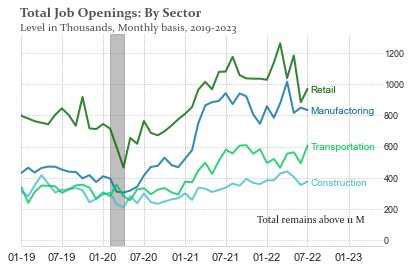

In [16]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(6,4))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.12, y=.935, s="Total Job Openings: By Sector", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Level in Thousands, Monthly basis, 2019-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2',"#006400","#00C957"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

plt.figtext(.67, .22, "Total remains above 11 M", **hfont)


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2019-01-01"), date.fromisoformat("2023-06-01")])

#plt.ylim([float(-20), float(30)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")

ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.savefig('filename.png', dpi=400, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

In [503]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch

#Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis

gdp = fred.get_series('DGS10', frequency = "m")
gdp.name = 'Treasuries Yields 10-Year'

#effective fed
real_gdp = fred.get_series('EFFR', frequency = "m")
real_gdp.name = 'EFFR'

gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = 'Treasuries Yields 10-Year'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'EFFR'

#----------------------

gdp1 = fred.get_series('BAMLC0A4CBBBEY',frequency = "m")
gdp1.name = 'Corporate Index Yield'

real_gdp1 = fred.get_series('BAMLH0A0HYM2EY', frequency = "m")
real_gdp1.name = 'Corporate High Index Yield'

gdp_plot1 = gdp1.to_frame()
gdp_plot1['year'] = gdp_plot1.index
gdp_plot1.reset_index(drop=True, inplace=True)
gdp_plot1.dropna(inplace=True)
gdp_plot1['type'] = 'Corporate Index Yield'

real_gdp_plot1 = real_gdp1.to_frame()
real_gdp_plot1['year'] = real_gdp1.index
real_gdp_plot1.reset_index(drop=True, inplace=True)
real_gdp_plot1.dropna(inplace=True)
real_gdp_plot1['type'] = ' Corporate High Index Yield'


#in this case, we need to merge datasets to compare them both

all_dfs = [gdp_plot, real_gdp_plot, gdp_plot1, real_gdp_plot1]


# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']
    

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], ascending = True,  inplace = True)


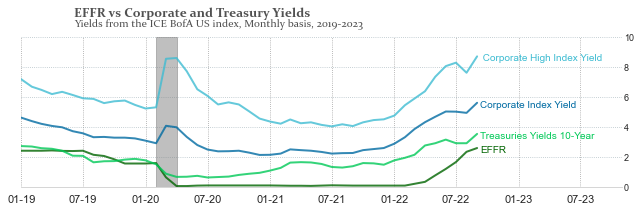

In [513]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(9,3))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.12, y=.920, s="EFFR vs Corporate and Treasury Yields", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.870, s="Yields from the ICE BofA US index, Monthly basis, 2019-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2',"#006400","#00C957"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

#plt.figtext(.67, .22, "Total remains above 11 M", **hfont)


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2019-01-01"), date.fromisoformat("2023-11-01")])

plt.ylim([float(0), float(10)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")

ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.savefig('filename.png', dpi=300, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

In [501]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch

#Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis

gdp = fred.get_series('T5YIE', frequency = "m")
gdp.name = 'Breakeven-5year'

#effective fed
real_gdp = fred.get_series('T30YIEM', frequency = "m")
real_gdp.name = 'Breakeven-30year'

gdp_plot = gdp.to_frame()
gdp_plot['year'] = gdp_plot.index
gdp_plot.reset_index(drop=True, inplace=True)
gdp_plot.dropna(inplace=True)
gdp_plot['type'] = 'Breakeven-5year'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Breakeven-30year'

#----------------------

gdp1 = fred.get_series('MICH',frequency = "m")
gdp1.name = 'Umich Expectations'

real_gdp1 = fred.get_series('PCETRIM12M159SFRBDAL', frequency = "m")
real_gdp1.name = 'Dallas Trimmed Mean'

gdp_plot1 = gdp1.to_frame()
gdp_plot1['year'] = gdp_plot1.index
gdp_plot1.reset_index(drop=True, inplace=True)
gdp_plot1.dropna(inplace=True)
gdp_plot1['type'] = ' 1-year Umich Expected'

real_gdp_plot1 = real_gdp1.to_frame()
real_gdp_plot1['year'] = real_gdp1.index
real_gdp_plot1.reset_index(drop=True, inplace=True)
real_gdp_plot1.dropna(inplace=True)
real_gdp_plot1['type'] = 'Dallas Trimmed Mean'


#in this case, we need to merge datasets to compare them both

all_dfs = [gdp_plot, real_gdp_plot, gdp_plot1]


# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']
    

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], ascending = True,  inplace = True)


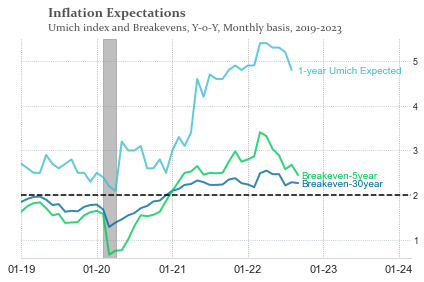

In [502]:
#now lets subset the data 

fig, ax = plt.subplots()


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.12, y=.935, s="Inflation Expectations", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Umich index and Breakevens, Y-o-Y, Monthly basis, 2019-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2',"#00C957"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

#plt.figtext(.67, .22, "Total remains above 11 M", **hfont)


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2019-01-01"), date.fromisoformat("2024-03-01")])

plt.ylim([float(0.6), float(5.5)])

#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")
plt.axhline(y = 2, color = "black",linestyle ='--')

ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.savefig('filename.png', dpi=400, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 



plt.show()

In [58]:
durables = fred.get_series('PCEDGC96',frequency = "q", observation_start = '2015-01-01')
durables.name = 'Durables'
nondurables = fred.get_series('PCNDGC96', frequency = "q", observation_start = '2015-01-01')
nondurables.name = 'Non-Durables'
services = fred.get_series('PCESC96', frequency = "q", observation_start = '2015-01-01')
services.name = 'Services'
durables_plot = durables.to_frame()
durables_plot['year'] = durables_plot.index
durables_plot.reset_index(drop=True, inplace=True)
durables_plot.dropna(inplace=True)
durables_plot['type'] = 'Durables'
durables_plot['Indexed Dollars'] = durables_plot['Durables'].div(16.357).round(2)
nondurables_plot = nondurables.to_frame()
nondurables_plot['year'] = nondurables.index
nondurables_plot.reset_index(drop=True, inplace=True)
nondurables_plot.dropna(inplace=True)
nondurables_plot['type'] = 'Non-Durables'
nondurables_plot['Indexed Dollars'] = nondurables_plot['Non-Durables'].div(28.763).round(2)
services_plot = services.to_frame()
services_plot['year'] = services_plot.index
services_plot.reset_index(drop=True, inplace=True)
services_plot.dropna(inplace=True)
services_plot['type'] = 'Services'
services_plot['Indexed Dollars'] = services_plot['Services'].div(82.135).round(2)
#in this case, the third is a difference, but you can change that easity by copy pasting the top
#diff = pd.DataFrame()
#diff['Percentage'] = gdp_plot.iloc[:, 0] - real_gdp_plot.iloc[:, 0]
#diff['Year'] = real_gdp_plot.iloc[:, 1]
#diff.reset_index(drop=True, inplace=True)
#diff.dropna(inplace=True)
#diff['type'] = 'Difference'
#in this case, we need to merge datasets to compare them both
all_dfs = [durables_plot, nondurables_plot, services_plot]
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Dollars', 'Year', 'type1', 'Indexed Dollars']
merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)


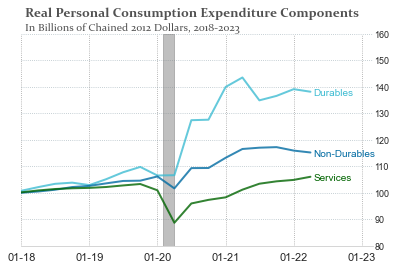

In [61]:

#now lets subset the data
fig, ax = plt.subplots(figsize=(6,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}
ax.text(x=0.12, y=.935, s="Real Personal Consumption Expenditure Components", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="In Billions of Chained 2012 Dollars, 2018-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Indexed Dollars", hue = "type1", palette = ['#3EBCD2', '#006BA2', "#006400"], legend=None,
            alpha=0.8,
            linewidth=2)
#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue    
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
plt.tight_layout()
#set the y limits of the graph
plt.ylim([80, 160])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.figtext(.67, .22, "Total remains above 11 M", **hfont)
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=11) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)    
ax.set(xlabel=None)
from datetime import date
plt.xlim([date.fromisoformat("2018-01-01"), date.fromisoformat("2023-03-01")])
#plt.ylim([float(2), float(8)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.axhline(y = 0, color = "black",linestyle ='--')
ax.set(ylabel=None)
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  ."))
plt.show()

# Example two of 4 variables

In [81]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch

real_gdp = fred.get_series('PCETRIM12M159SFRBDAL', frequency = "m", units= "ch1")
real_gdp.name = 'Dallas Trimmed Mean'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Dallas Trimmed Mean'

#----------------------

gdp1 = fred.get_series('UNRATE',frequency = "m",units= "ch1")
gdp1.name = 'U-3'

real_gdp1 = fred.get_series('PCEPI', frequency = "m",units= "ch1")
real_gdp1.name = 'Price-index PCE'

gdp_plot1 = gdp1.to_frame()
gdp_plot1['year'] = gdp_plot1.index
gdp_plot1.reset_index(drop=True, inplace=True)
gdp_plot1.dropna(inplace=True)
gdp_plot1['type'] = 'U-3'

real_gdp_plot1 = real_gdp1.to_frame()
real_gdp_plot1['year'] = real_gdp1.index
real_gdp_plot1.reset_index(drop=True, inplace=True)
real_gdp_plot1.dropna(inplace=True)
real_gdp_plot1['type'] = 'Price-index PCE'

gdp2 = fred.get_series('JTSJOR',frequency = "m",units= "ch1")
gdp2.name = 'Job Openings Rate'

gdp_plot2 = gdp2.to_frame()
gdp_plot2['year'] = gdp_plot2.index
gdp_plot2.reset_index(drop=True, inplace=True)
gdp_plot2.dropna(inplace=True)
gdp_plot2['type'] = 'Job Openings Rate'

all_dfs1 = [gdp_plot1, real_gdp_plot1]
    
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs1:
    df.columns = ['Percentage', 'Year', 'type1']
merg1 = pd.concat(all_dfs1).reset_index(drop=True)



#in this case, we need to merge datasets to compare them both

all_dfs = [real_gdp_plot,gdp_plot1, real_gdp_plot1,gdp_plot2]


# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']
    

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], ascending = True,  inplace = True)


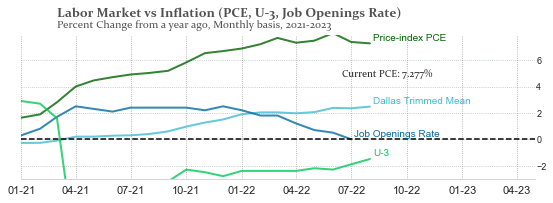

In [85]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(9,3))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.12, y=.935, s="Labor Market vs Inflation (PCE, U-3, Job Openings Rate)", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Percent Change from a year ago, Monthly basis, 2021-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2',"#006400","#00C957"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, 3),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2021-01-01"), date.fromisoformat("2023-05-01")])

plt.ylim([float(-3), float(7.9)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")

ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.axhline(y = 0, color = "black",linestyle ='--')

plt.figtext(.56, .66, "Current PCE: " + str(real_gdp_plot1["Percentage"].iloc[-1])+ "%", **hfont)


#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 

plt.savefig('filename.png', dpi=400, bbox_inches='tight')


plt.show()

In [86]:
#Case Shiller Index --- shelter inflation
oer = fred.get_series('CSUSHPINSA')
oer.name = 'S&P/CS Index'
oer_plot = oer.to_frame()
oer_plot['Month'] = oer_plot.index
oer_plot.reset_index(drop=True, inplace=True)
oer_plot.dropna(inplace=True)
oer_plot['type'] = 'S&P/CS'
oer_plot.columns = ['Index', 'Month', 'type1']
oer_plot
    
 

,Index,Month,type1
144,63.734,1987-01-01,S&P/CS
145,64.134,1987-02-01,S&P/CS
146,64.470,1987-03-01,S&P/CS
147,64.974,1987-04-01,S&P/CS
148,65.548,1987-05-01,S&P/CS
...,...,...,...
566,295.054,2022-03-01,S&P/CS
567,301.655,2022-04-01,S&P/CS
568,306.639,2022-05-01,S&P/CS
569,308.468,2022-06-01,S&P/CS


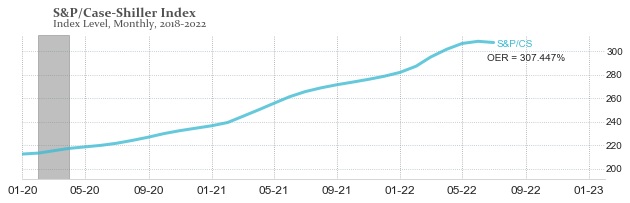

In [92]:
   
fig, ax = plt.subplots(figsize=(9,3))
#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}
#text and title
ax.text(x=0.12, y=.935, s="S&P/Case-Shiller Index", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Index Level, Monthly, 2018-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
#set the lines with the dataset 
sns.lineplot(ax=ax, data=oer_plot[oer_plot["Month"] > '2018-01-01'], x="Month", y="Index", hue = "type1", palette = ['#3EBCD2'], legend=None, 
            alpha=0.8, 
            linewidth=3)
#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(oer_plot["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)
#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)
#plot info inside of the graph
plt.figtext(.79, .73, "OER = " + str(oer_plot["Index"].iloc[-1]) + "%")
#plt.figtext(.80, .68, "U-6 = " + str(data_2_plot["Percentage"].iloc[-1])+ "%")
#plot grey area for recession information
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS
#plt.ylim([12000, 27500])
#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2020-01-01"), datetime.date.fromisoformat("2023-02-01")])
#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
plt.show()

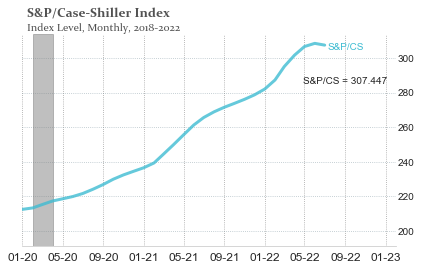

In [97]:

fig, ax = plt.subplots()

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.12, y=.935, s="S&P/Case-Shiller Index", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Index Level, Monthly, 2018-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)


#set the lines with the dataset 
sns.lineplot(ax=ax, data=oer_plot[oer_plot["Month"] > '2018-01-01'], x="Month", y="Index", hue = "type1", palette = ['#3EBCD2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(oer_plot["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph
plt.figtext(.76, .70, "S&P/CS = " + str(oer_plot["Index"].iloc[-1]) + "")
#plt.figtext(.80, .68, "U-6 = " + str(data_2_plot["Percentage"].iloc[-1])+ "%")


#plot grey area for recession information
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

#plt.ylim([12000, 27500])

#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2020-01-01"), datetime.date.fromisoformat("2023-02-01")])

#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
plt.show()

In [116]:
total = fred.get_series('AMTMNO',frequency = "m", observation_start = '2015-01-01')
total.name = 'TotalManu'
durable = fred.get_series('DGORDER', frequency = "m", observation_start = '2015-01-01')
durable.name = 'DurableManu'
unfilled = fred.get_series('AMDMUO', frequency = "m", observation_start = '2015-01-01')
unfilled.name = 'UnfilledDurables'
total_plot = total.to_frame()
total_plot['year'] = total_plot.index
total_plot.reset_index(drop=True, inplace=True)
total_plot.dropna(inplace=True)
total_plot['type'] = 'Total New Orders'
durables_plot = durable.to_frame()
durables_plot['year'] = durable.index
durables_plot.reset_index(drop=True, inplace=True)
durables_plot.dropna(inplace=True)
durables_plot['type'] = 'Durable New Orders'
unfilled_plot = unfilled.to_frame()
unfilled_plot['year'] = unfilled_plot.index
unfilled_plot.reset_index(drop=True, inplace=True)
unfilled_plot.dropna(inplace=True)
unfilled_plot['type'] = 'Unfilled Durable New Orders'
#in this case, the third is a difference, but you can change that easity by copy pasting the top
#diff = pd.DataFrame()
#diff['Percentage'] = gdp_plot.iloc[:, 0] - real_gdp_plot.iloc[:, 0]
#diff['Year'] = real_gdp_plot.iloc[:, 1]
#diff.reset_index(drop=True, inplace=True)
#diff.dropna(inplace=True)
#diff['type'] = 'Difference'
#in this case, we need to merge datasets to compare them both
all_dfs = [total_plot, durables_plot, unfilled_plot]
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Dollars', 'Year', 'type1']
merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

In [117]:
merg

,Dollars,Year,type1
137,231653.0,2018-11-01,Durable New Orders
116,221815.0,2017-02-01,Durable New Orders
117,221965.0,2017-03-01,Durable New Orders
118,222025.0,2017-04-01,Durable New Orders
119,222398.0,2017-05-01,Durable New Orders
...,...,...,...
208,1178642.0,2017-02-01,Unfilled Durable New Orders
207,1179850.0,2017-01-01,Unfilled Durable New Orders
206,1184562.0,2016-12-01,Unfilled Durable New Orders
215,1177615.0,2017-09-01,Unfilled Durable New Orders


In [118]:
merg['Dollars'] = merg['Dollars'].div(100000).round(2)

In [119]:
merg

,Dollars,Year,type1
137,2.32,2018-11-01,Durable New Orders
116,2.22,2017-02-01,Durable New Orders
117,2.22,2017-03-01,Durable New Orders
118,2.22,2017-04-01,Durable New Orders
119,2.22,2017-05-01,Durable New Orders
...,...,...,...
208,11.79,2017-02-01,Unfilled Durable New Orders
207,11.80,2017-01-01,Unfilled Durable New Orders
206,11.85,2016-12-01,Unfilled Durable New Orders
215,11.78,2017-09-01,Unfilled Durable New Orders


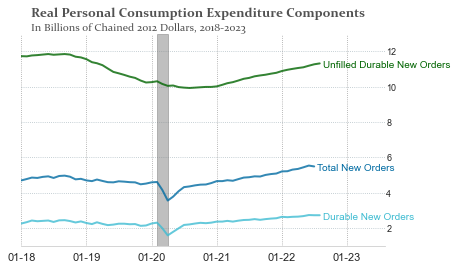

In [124]:
#now lets subset the data
fig, ax = plt.subplots(figsize=(6,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}
ax.text(x=0.12, y=.935, s="Real Personal Consumption Expenditure Components", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="In Billions of Chained 2012 Dollars, 2018-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Dollars", hue = "type1", palette = ['#3EBCD2', '#006BA2', "#006400"], legend=None,
            alpha=0.8,
            linewidth=2)
#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue    
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
plt.tight_layout()
#set the y limits of the graph
plt.ylim([80, 160])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.figtext(.67, .22, "Total remains above 11 M", **hfont)
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=11) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)    
ax.set(xlabel=None)
from datetime import date
plt.xlim([date.fromisoformat("2018-01-01"), date.fromisoformat("2023-08-01")])
plt.ylim([float(1), float(13)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.axhline(y = 0, color = "black",linestyle ='--')
ax.set(ylabel=None)

plt.savefig('filename.png', dpi=400, bbox_inches='tight')

#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  ."))
plt.show()

In [133]:
durables = fred.get_series('PCEDGC96',frequency = "q", observation_start = '2015-01-01')
durables.name = 'Durables'
nondurables = fred.get_series('PCNDGC96', frequency = "q", observation_start = '2015-01-01')
nondurables.name = 'NonDurables'
services = fred.get_series('PCESC96', frequency = "q", observation_start = '2015-01-01')
services.name = 'Services'
durables_plot = durables.to_frame()
durables_plot['year'] = durables_plot.index
durables_plot.reset_index(drop=True, inplace=True)
durables_plot.dropna(inplace=True)
durables_plot['type'] = 'Durables Consumption'
durables_plot['Indexed Dollars'] = durables_plot['Durables'].div(16.357).round(2)
nondurables_plot = nondurables.to_frame()
nondurables_plot['year'] = nondurables.index
nondurables_plot.reset_index(drop=True, inplace=True)
nondurables_plot.dropna(inplace=True)
nondurables_plot['type'] = 'NonDurables Consumption'
nondurables_plot['Indexed Dollars'] = nondurables_plot['NonDurables'].div(28.763).round(2)
services_plot = services.to_frame()
services_plot['year'] = services_plot.index
services_plot.reset_index(drop=True, inplace=True)
services_plot.dropna(inplace=True)
services_plot['type'] = 'Services Consumption'
services_plot['Indexed Dollars'] = services_plot['Services'].div(82.135).round(2)
#in this case, the third is a difference, but you can change that easity by copy pasting the top
#diff = pd.DataFrame()
#diff['Percentage'] = gdp_plot.iloc[:, 0] - real_gdp_plot.iloc[:, 0]
#diff['Year'] = real_gdp_plot.iloc[:, 1]
#diff.reset_index(drop=True, inplace=True)
#diff.dropna(inplace=True)
#diff['type'] = 'Difference'
#in this case, we need to merge datasets to compare them both
all_dfs = [durables_plot, nondurables_plot, services_plot]
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Dollars', 'Year', 'type1', 'Indexed Dollars']
merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

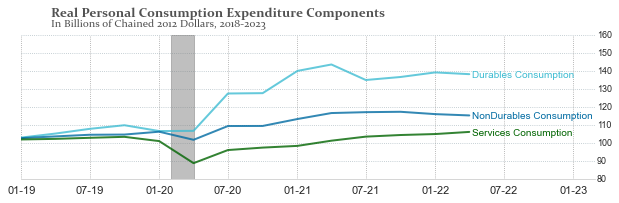

In [138]:
#now lets subset the data
fig, ax = plt.subplots(figsize=(9,3))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}
ax.text(x=0.12, y=.935, s="Real Personal Consumption Expenditure Components", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="In Billions of Chained 2012 Dollars, 2018-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Indexed Dollars", hue = "type1", palette = ['#3EBCD2', '#006BA2', "#006400"], legend=None,
            alpha=0.8,
            linewidth=2)
#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue    
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
plt.tight_layout()
#set the y limits of the graph
plt.ylim([80, 160])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
#plt.figtext(.67, .22, "Total remains above 11 M", **hfont)
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=11) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)    
ax.set(xlabel=None)
from datetime import date
plt.xlim([date.fromisoformat("2019-01-01"), date.fromisoformat("2023-03-01")])
#plt.ylim([float(2), float(8)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
plt.axhline(y = 0, color = "black",linestyle ='--')
ax.set(ylabel=None)
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  ."))
plt.show()

In [401]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, lin, log, pc1, pca, pch


#JTSJOL,JTSHIL,JTSQUL,JTSLDL,
real_gdp = fred.get_series('JTSJOL', frequency = "m")
real_gdp.name = 'Job Openings'

real_gdp_plot = real_gdp.to_frame()
real_gdp_plot['year'] = real_gdp.index
real_gdp_plot.reset_index(drop=True, inplace=True)
real_gdp_plot.dropna(inplace=True)
real_gdp_plot['type'] = 'Job Openings'

#----------------------

gdp1 = fred.get_series('JTSHIL',frequency = "m")
gdp1.name = 'New Hires'

real_gdp1 = fred.get_series('JTSQUL', frequency = "m")
real_gdp1.name = 'Quits'

gdp_plot1 = gdp1.to_frame()
gdp_plot1['year'] = gdp_plot1.index
gdp_plot1.reset_index(drop=True, inplace=True)
gdp_plot1.dropna(inplace=True)
gdp_plot1['type'] = 'New Hires'

real_gdp_plot1 = real_gdp1.to_frame()
real_gdp_plot1['year'] = real_gdp1.index
real_gdp_plot1.reset_index(drop=True, inplace=True)
real_gdp_plot1.dropna(inplace=True)
real_gdp_plot1['type'] = 'Quits'

gdp2 = fred.get_series('JTSLDL',frequency = "m")
gdp2.name = 'Layoffs'

gdp_plot2 = gdp2.to_frame()
gdp_plot2['year'] = gdp_plot2.index
gdp_plot2.reset_index(drop=True, inplace=True)
gdp_plot2.dropna(inplace=True)
gdp_plot2['type'] = 'Layoffs'

all_dfs1 = [real_gdp_plot, gdp_plot1, real_gdp_plot1]
    
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs1:
    df.columns = ['Percentage', 'Year', 'type1']
merg1 = pd.concat(all_dfs1).reset_index(drop=True)



#in this case, we need to merge datasets to compare them both

all_dfs = [real_gdp_plot,gdp_plot1, real_gdp_plot1,gdp_plot2]


# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']
    

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], ascending = True,  inplace = True)


In [402]:
merg['Percentage'] = merg['Percentage'].div(1000).round(2)

In [403]:
merg

,Percentage,Year,type1
0,5.09,2000-12-01,Job Openings
166,5.01,2014-10-01,Job Openings
167,4.84,2014-11-01,Job Openings
168,5.13,2014-12-01,Job Openings
169,5.34,2015-01-01,Job Openings
...,...,...,...
688,2.72,2014-10-01,Quits
687,2.73,2014-09-01,Quits
686,2.55,2014-08-01,Quits
684,2.51,2014-06-01,Quits


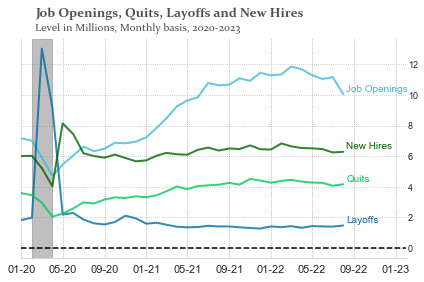

In [406]:
#now lets subset the data 

fig, ax = plt.subplots(figsize=(6,4))


ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}

ax.text(x=0.09, y=.935, s="Job Openings, Quits, Layoffs and New Hires", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.09, y=.885, s="Level in Millions, Monthly basis, 2020-2023", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)

#set the lines together with the title
sns.lineplot(ax=ax, data=merg, x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2',"#006400","#00C957"], legend=None, 
            alpha=0.8, 
            linewidth=2)

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, 3),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
#plt.ylim([12000, 27500])
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})


ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
ax.spines[['top','right','left']].set_visible(False)

ax.xaxis.set_tick_params(labelsize=11)  
   

ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=9)     

ax.set(xlabel=None)
from datetime import date

plt.xlim([date.fromisoformat("2020-01-01"), date.fromisoformat("2023-02-01")])

#plt.ylim([float(-1200), float(6000)])
#fig.autofmt_xdate()
date_form = DateFormatter("%m-%y")

ax.xaxis.set_major_formatter(date_form)

ax.set(ylabel=None)
plt.axhline(y = 0, color = "black",linestyle ='--')

#plt.figtext(.56, .66, "Current PCE: " + str(real_gdp_plot1["Percentage"].iloc[-1])+ "%", **hfont)


#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%d  .")) 

plt.savefig('filename.png', dpi=400, bbox_inches='tight')


plt.show()

In [196]:
total = fred.get_series('AMTMNO',frequency = "m", observation_start = '2015-01-01')
total.name = 'TotalManu'
durable = fred.get_series('DGORDER', frequency = "m", observation_start = '2015-01-01')
durable.name = 'DurableManu'
unfilled = fred.get_series('AMDMUO', frequency = "m", observation_start = '2015-01-01')
unfilled.name = 'UnfilledDurables'
total_plot = total.to_frame()
total_plot['year'] = total_plot.index
total_plot.reset_index(drop=True, inplace=True)
total_plot.dropna(inplace=True)
total_plot['type'] = 'Total New Orders'
durables_plot = durable.to_frame()
durables_plot['year'] = durable.index
durables_plot.reset_index(drop=True, inplace=True)
durables_plot.dropna(inplace=True)
durables_plot['type'] = 'Durable New Orders'
unfilled_plot = unfilled.to_frame()
unfilled_plot['year'] = unfilled_plot.index
unfilled_plot.reset_index(drop=True, inplace=True)
unfilled_plot.dropna(inplace=True)
unfilled_plot['type'] = 'Unfilled Durable New Orders'
#in this case, the third is a difference, but you can change that easity by copy pasting the top
#diff = pd.DataFrame()
#diff['Percentage'] = gdp_plot.iloc[:, 0] - real_gdp_plot.iloc[:, 0]
#diff['Year'] = real_gdp_plot.iloc[:, 1]
#diff.reset_index(drop=True, inplace=True)
#diff.dropna(inplace=True)
#diff['type'] = 'Difference'
#in this case, we need to merge datasets to compare them both
all_dfs = [total_plot, durables_plot]
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Dollars', 'Year', 'type1']
merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

In [197]:
merg['Dollars'] = merg['Dollars'].div(1000).round(2)

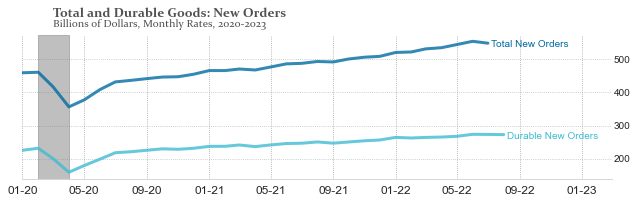

In [198]:
#two compare two values
fig, ax = plt.subplots(figsize=(9,3))#set fonds and grid

ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}
#text and title
ax.text(x=0.12, y=.935, s="Total and Durable Goods: New Orders", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Billions of Dollars, Monthly Rates, 2020-2023 ", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
#set the lines with the dataset
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2018-01-01'], x="Year", y="Dollars", hue = "type1", palette = ['#3EBCD2', '#006BA2'], legend=None,
            alpha=0.8,
            linewidth=3)
#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue    
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)
#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)    
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)
#plot grey area for recession information
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS
#plt.ylim([110, 126])
#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2020-01-01"), datetime.date.fromisoformat("2023-03-01")])
#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
plt.show()

In [199]:
unfilled = fred.get_series('AMDMUO', frequency = "m", observation_start = '2015-01-01')
unfilled.name = 'UnfilledDurables'
unfilled_plot = unfilled.to_frame()
unfilled_plot['year'] = unfilled_plot.index
unfilled_plot.reset_index(drop=True, inplace=True)
unfilled_plot.dropna(inplace=True)
unfilled_plot['type'] = 'Unfilled Durable New Orders'
merg['Dollars'] = merg['Dollars'].div(1000).round(2)
#in this case, the third is a difference, but you can change that easity by copy pasting the top
#diff = pd.DataFrame()
#diff['Percentage'] = gdp_plot.iloc[:, 0] - real_gdp_plot.iloc[:, 0]
#diff['Year'] = real_gdp_plot.iloc[:, 1]
#diff.reset_index(drop=True, inplace=True)
#diff.dropna(inplace=True)
#diff['type'] = 'Difference'
#in this case, we need to merge datasets to compare them both
all_dfs = [unfilled_plot]
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Dollars', 'Year', 'type1']
merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

In [200]:
merg['Dollars'] = merg['Dollars'].div(1000).round(2)

In [201]:
merg

,Dollars,Year,type1
0,1249.54,2015-01-01,Unfilled Durable New Orders
66,995.15,2020-07-01,Unfilled Durable New Orders
65,998.17,2020-06-01,Unfilled Durable New Orders
64,1006.92,2020-05-01,Unfilled Durable New Orders
63,1005.43,2020-04-01,Unfilled Durable New Orders
...,...,...,...
26,1176.39,2017-03-01,Unfilled Durable New Orders
25,1178.64,2017-02-01,Unfilled Durable New Orders
24,1179.85,2017-01-01,Unfilled Durable New Orders
33,1177.01,2017-10-01,Unfilled Durable New Orders


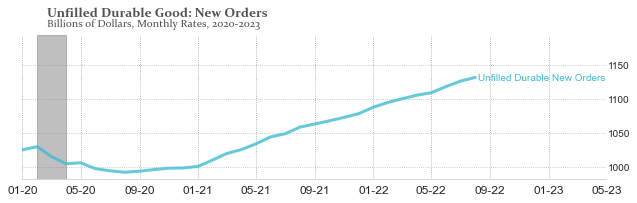

In [202]:
#two compare two values
fig, ax = plt.subplots(figsize=(9,3))#set fonds and grid

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}
#text and title
ax.text(x=0.12, y=.935, s="Unfilled Durable Good: New Orders", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Billions of Dollars, Monthly Rates, 2020-2023 ", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
#set the lines with the dataset
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2018-01-01'], x="Year", y="Dollars", hue = "type1", palette = ['#3EBCD2'], legend=None,
            alpha=0.8,
            linewidth=3)
#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue    
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)
#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)    
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)
#plot grey area for recession information
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS
#plt.ylim([110, 126])
#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2020-01-01"), datetime.date.fromisoformat("2023-05-01")])
#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
plt.show()

In [220]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, l
#frequency = "q" or "m"
#these are things you can put inside the get_series function
data_1 = fred.get_series('MSPUS',frequency = "q", observation_start = '2015-01-01')
data_1.name = 'Price'
data_1_plot = data_1.to_frame()
data_1_plot['year'] = data_1_plot.index
data_1_plot.reset_index(drop=True, inplace=True)
data_1_plot.dropna(inplace=True)
data_1_plot['type'] = 'Median Sale Price'

data_1_plot['Price'] = data_1_plot['Price'].div(1000).round(2)

data_2 = fred.get_series('WPU08',frequency = "m", observation_start = '2015-01-01')
data_2.name = 'Lumber'
data_2_plot = data_2.to_frame()
data_2_plot['year'] = data_2_plot.index
data_2_plot.reset_index(drop=True, inplace=True)
data_2_plot.dropna(inplace=True)
data_2_plot['type'] = 'Lumber'
data_3 = fred.get_series('HSN1F', frequency = "m", observation_start = '2015-01-01')
data_3.name = 'New Homes'
data_3_plot = data_3.to_frame()
data_3_plot['year'] = data_3_plot.index
data_3_plot.reset_index(drop=True, inplace=True)
data_3_plot.dropna(inplace=True)
data_3_plot['type'] = 'NewHomes'
#in this case, we need to merge datasets to compare them both
all_dfs = [data_1_plot, data_2_plot, data_3_plot]
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']
merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

In [219]:
data_1_plot

,Price,year,type
0,289200.0,2015-01-01,Median Sale Price
1,289100.0,2015-04-01,Median Sale Price
2,295800.0,2015-07-01,Median Sale Price
3,302500.0,2015-10-01,Median Sale Price
4,299800.0,2016-01-01,Median Sale Price
5,306000.0,2016-04-01,Median Sale Price
6,303800.0,2016-07-01,Median Sale Price
7,310900.0,2016-10-01,Median Sale Price
8,313100.0,2017-01-01,Median Sale Price
9,318200.0,2017-04-01,Median Sale Price


In [217]:
data_1_plot

,Percentage,Year,type1
0,289200.0,2015-01-01,Median Sale Price
1,289100.0,2015-04-01,Median Sale Price
2,295800.0,2015-07-01,Median Sale Price
3,302500.0,2015-10-01,Median Sale Price
4,299800.0,2016-01-01,Median Sale Price
5,306000.0,2016-04-01,Median Sale Price
6,303800.0,2016-07-01,Median Sale Price
7,310900.0,2016-10-01,Median Sale Price
8,313100.0,2017-01-01,Median Sale Price
9,318200.0,2017-04-01,Median Sale Price


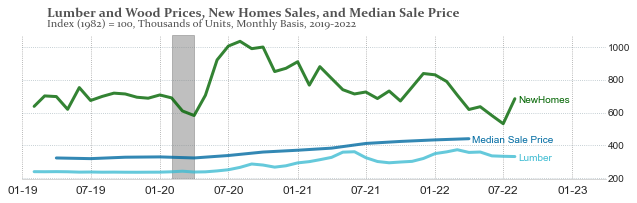

In [231]:
fig, ax = plt.subplots(figsize=(9,3))
#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}
#text and title
ax.text(x=0.12, y=.935, s="Lumber and Wood Prices, New Homes Sales, and Median Sale Price", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Index (1982) = 100, Thousands of Units, Monthly Basis, 2019-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
#set the lines with the dataset
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2019-01-01'], x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2', '#006BA2', "#006400"], legend=None,
            alpha=0.8,
            linewidth=3)
#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue    
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)
#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)    
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)
#plot grey area for recession information
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS
#plt.ylim([110, 126])
#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2019-01-01"), datetime.date.fromisoformat("2023-04-01")])
#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
plt.show()

In [243]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, l
#frequency = "q" or "m"
#these are things you can put inside the get_series function
data_1 = fred.get_series('PRFIC1',frequency = "q", observation_start = '2015-01-01')
data_1.name = 'Price'
data_1_plot = data_1.to_frame()
data_1_plot['year'] = data_1_plot.index
data_1_plot.reset_index(drop=True, inplace=True)
data_1_plot.dropna(inplace=True)
data_1_plot['type'] = 'Residential Fixed Investment'
#in this case, we need to merge datasets to compare them both
all_dfs = [data_1_plot]
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']
merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)



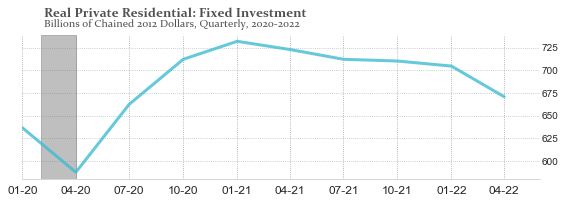

In [246]:


fig, ax = plt.subplots(figsize=(8,3))

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}
#text and title
ax.text(x=0.12, y=.935, s="Real Private Residential: Fixed Investment", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Billions of Chained 2012 Dollars, Quarterly, 2020-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
#set the lines with the dataset
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2018-01-01'], x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2'], legend=None,
            alpha=0.8,
            linewidth=3)

plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)    
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)
#plot grey area for recession information
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS
#plt.ylim([110, 126])
#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2020-01-01"), datetime.date.fromisoformat("2022-06-01")])
#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
plt.show()

In [397]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, l

#frequency = "q" or "m"
#these are things you can put inside the get_series function

data_1 = fred.get_series('PCEPI', frequency = "m", units= "pc1")
data_1.name = 'Headline PCE'


data_2 = fred.get_series('PCEPILFE', frequency = "m",units= "pc1")
data_2.name = 'Core PCE'

data_1_plot = data_1.to_frame()
data_1_plot['year'] = data_1_plot.index
data_1_plot.reset_index(drop=True, inplace=True)
data_1_plot.dropna(inplace=True)
data_1_plot['type'] = 'Headline PCE'

data_2_plot = data_2.to_frame()
data_2_plot['year'] = data_2_plot.index
data_2_plot.reset_index(drop=True, inplace=True)
data_2_plot.dropna(inplace=True)
data_2_plot['type'] = 'Core PCE'

#in this case, we need to merge datasets to compare them both

all_dfs = [data_1_plot, data_2_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

In [261]:
data_1_plot

,Percentage,Year,type1
12,0.272,1960-01-01,Headline PCE
13,0.274,1960-02-01,Headline PCE
14,0.272,1960-03-01,Headline PCE
15,0.300,1960-04-01,Headline PCE
16,0.308,1960-05-01,Headline PCE
...,...,...,...
759,7.325,2022-04-01,Headline PCE
760,7.481,2022-05-01,Headline PCE
761,8.054,2022-06-01,Headline PCE
762,7.383,2022-07-01,Headline PCE


In [259]:
data_2_plot

,Percentage,Year,type1
12,0.272,1960-01-01,Core PCE
13,0.274,1960-02-01,Core PCE
14,0.272,1960-03-01,Core PCE
15,0.300,1960-04-01,Core PCE
16,0.308,1960-05-01,Core PCE
...,...,...,...
759,7.325,2022-04-01,Core PCE
760,7.481,2022-05-01,Core PCE
761,8.054,2022-06-01,Core PCE
762,7.383,2022-07-01,Core PCE


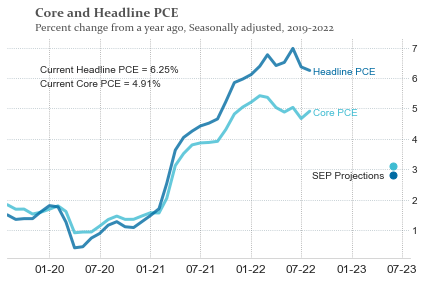

In [400]:
#two compare two values

fig, ax = plt.subplots()

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.09, y=.935, s="Core and Headline PCE", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.09, y=.885, s="Percent change from a year ago, Seasonally adjusted, 2019-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
 
    #'#3EBCD2',

#set the lines with the dataset 
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2019-07-01'], x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2','#006BA2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph
plt.figtext(.1, .74, "Current Headline PCE = " + str("{:.2f}".format(data_1_plot["Percentage"].iloc[-1])) + "%")
plt.figtext(.1, .69, "Current Core PCE = " + str("{:.2f}".format(data_2_plot["Percentage"].iloc[-1])) + "%")

plt.figtext(.73, .37, "SEP Projections  ")


plt.plot(datetime.date.fromisoformat("2023-05-30"),2.8, marker="o",markeredgecolor='#006BA2',  markersize=7, markerfacecolor="#006BA2")


plt.plot(datetime.date.fromisoformat("2023-05-30"),3.1, marker="o",markeredgecolor='#3EBCD2',  markersize=7, markerfacecolor="#3EBCD2")



#plot grey area for recession information
#ax.axvspan('2019-01-01', '2024-12-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

#plt.ylim([12000, 27500])

#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat('2019-08-01'), datetime.date.fromisoformat('2023-08-01')])

#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=300, bbox_inches='tight')
plt.show()

In [270]:
unfilled = fred.get_series('NEWORDER', frequency = "m", observation_start = '2015-01-01', units = 'pc1')
unfilled.name = 'neworder'
unfilled_plot = unfilled.to_frame()
unfilled_plot['year'] = unfilled_plot.index
unfilled_plot.reset_index(drop=True, inplace=True)
unfilled_plot.dropna(inplace=True)
unfilled_plot['type'] = "New Orders: Nondefense Capital Goods Ex. Aircraft"
#in this case, the third is a difference, but you can change that easity by copy pasting the top
#diff = pd.DataFrame()
#diff['Percentage'] = gdp_plot.iloc[:, 0] - real_gdp_plot.iloc[:, 0]
#diff['Year'] = real_gdp_plot.iloc[:, 1]
#diff.reset_index(drop=True, inplace=True)
#diff.dropna(inplace=True)
#diff['type'] = 'Difference'
#in this case, we need to merge datasets to compare them both
all_dfs = [unfilled_plot]
# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Dollars', 'Year', 'type1']
merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)



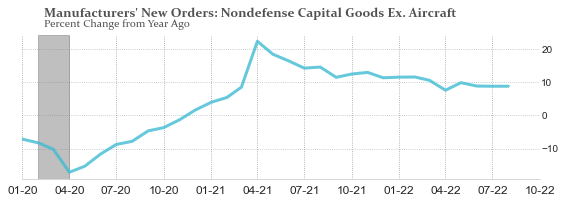

In [275]:


#two compare two values
fig, ax = plt.subplots(figsize=(8,3))
#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}
#text and title
ax.text(x=0.12, y=.935, s="Manufacturers' New Orders: Nondefense Capital Goods Ex. Aircraft", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Percent Change from Year Ago", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
#set the lines with the dataset
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2018-01-01'], x="Year", y="Dollars", hue = "type1", palette = ['#3EBCD2'], legend=None,
            alpha=0.8,
            linewidth=3)
#plot the names at the end of the line

#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)    
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)
#plot grey area for recession information
ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')
#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS
#plt.ylim([110, 126])
#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2020-01-01"), datetime.date.fromisoformat("2022-10-01")])
#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=400, bbox_inches='tight')
plt.show()

In [290]:
#units Value of units is not one of: cap, cca, cch, ch1, chg, l

#frequency = "q" or "m"
#these are things you can put inside the get_series function

data_1 = fred.get_series('USAUCSFRCONDOSMSAMID', frequency = "m", units= "pc1")
data_1.name = 'Zillow-Index'


data_2 = fred.get_series('CUSR0000SEHC', frequency = "m",units= "pc1")
data_2.name = 'CPI-Rent'

data_1_plot = data_1.to_frame()
data_1_plot['year'] = data_1_plot.index
data_1_plot.reset_index(drop=True, inplace=True)
data_1_plot.dropna(inplace=True)
data_1_plot['type'] = 'Zillow-Index'

data_2_plot = data_2.to_frame()
data_2_plot['year'] = data_2_plot.index
data_2_plot.reset_index(drop=True, inplace=True)
data_2_plot.dropna(inplace=True)
data_2_plot['type'] = 'CPI-Rent'

#in this case, we need to merge datasets to compare them both

all_dfs = [data_1_plot, data_2_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Percentage', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)

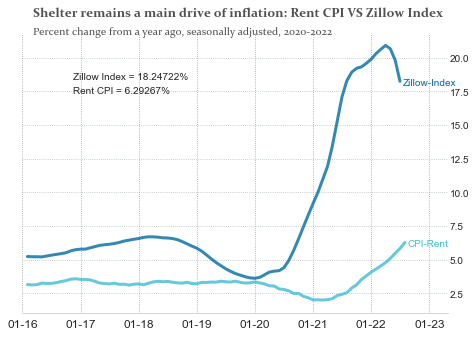

In [306]:
#two compare two values

fig, ax = plt.subplots(figsize=(7,5))

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.12, y=.935, s="Shelter remains a main drive of inflation: Rent CPI VS Zillow Index", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.12, y=.885, s="Percent change from a year ago, seasonally adjusted, 2020-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
 
    #'#3EBCD2',

#set the lines with the dataset 
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2016-01-01'], x="Year", y="Percentage", hue = "type1", palette = ['#3EBCD2','#006BA2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(merg["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph

plt.figtext(.20, .76, "Zillow Index = " + str(data_1_plot["Percentage"].iloc[-1]) + "%")
plt.figtext(.20, .72, "Rent CPI = " + str(data_2_plot["Percentage"].iloc[-1])+ "%")


#plot grey area for recession information
#ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

#plt.ylim([12000, 27500])

#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2016-01-01"), datetime.date.fromisoformat("2023-05-01")])

#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=300, bbox_inches='tight')
plt.show()

In [454]:
#NAHB WF
d = {'NAHB/WF Index': [76,80,83,84,83,81,79,77,69,67,55,49,46]}
nahb = pd.DataFrame(data=d, index = [datetime.date.fromisoformat("2021-09-01"),datetime.date.fromisoformat("2021-10-01"),datetime.date.fromisoformat("2021-11-01"),datetime.date.fromisoformat("2021-12-01"),datetime.date.fromisoformat("2022-01-01"),datetime.date.fromisoformat("2022-02-01"),datetime.date.fromisoformat("2022-03-01"),datetime.date.fromisoformat("2022-04-01"),datetime.date.fromisoformat("2022-05-01"),datetime.date.fromisoformat("2022-06-01"),datetime.date.fromisoformat("2022-07-01"),datetime.date.fromisoformat("2022-08-01"),datetime.date.fromisoformat("2022-09-01")])
nahb['Month'] = nahb.index
nahb.reset_index(drop=True, inplace=True)
nahb.dropna(inplace=True)
nahb['type'] = 'NAHB/WF'

nahb.columns = ['Percentage', 'Month', 'type1']

nahb

,Percentage,Month,type1
0,76,2021-09-01,NAHB/WF
1,80,2021-10-01,NAHB/WF
2,83,2021-11-01,NAHB/WF
3,84,2021-12-01,NAHB/WF
4,83,2022-01-01,NAHB/WF
5,81,2022-02-01,NAHB/WF
6,79,2022-03-01,NAHB/WF
7,77,2022-04-01,NAHB/WF
8,69,2022-05-01,NAHB/WF
9,67,2022-06-01,NAHB/WF


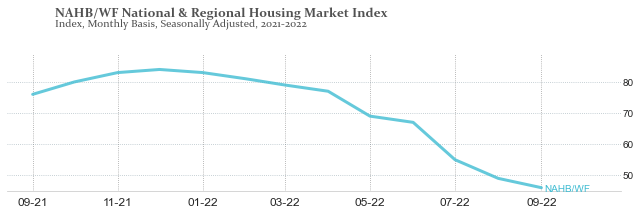

In [458]:
#two compare two values

fig, ax = plt.subplots(figsize=(9,3))

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.09, y=.935, s="NAHB/WF National & Regional Housing Market Index", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.09, y=.885, s="Index, Monthly Basis, Seasonally Adjusted, 2021-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
 
    #'#3EBCD2',

#set the lines with the dataset 
sns.lineplot(ax=ax, data=nahb, x="Month", y="Percentage", hue = "type1", palette = ['#3EBCD2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(nahb["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph



#plot grey area for recession information
#ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

plt.ylim([45, 89])

#note that to limit the x axis we use dates, not number as for the Y axis
#plt.xlim([datetime.date.fromisoformat("2016-01-01"), datetime.date.fromisoformat("2023-05-01")])

#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=300, bbox_inches='tight')
plt.show()

In [465]:
#30 year FR Mortgages
oer = fred.get_series('MORTGAGE30US')
oer.name = '30yr Fixed Rate'

oer_plot = oer.to_frame()
oer_plot['Week'] = oer_plot.index
oer_plot.reset_index(drop=True, inplace=True)
oer_plot.dropna(inplace=True)
oer_plot['type'] = '30YFRM'

oer_plot.columns = ['Index', 'Week', 'type1']

oer_plot

,Index,Week,type1
0,7.33,1971-04-02,30YFRM
1,7.31,1971-04-09,30YFRM
2,7.31,1971-04-16,30YFRM
3,7.31,1971-04-23,30YFRM
4,7.29,1971-04-30,30YFRM
...,...,...,...
2683,5.66,2022-09-01,30YFRM
2684,5.89,2022-09-08,30YFRM
2685,6.02,2022-09-15,30YFRM
2686,6.29,2022-09-22,30YFRM


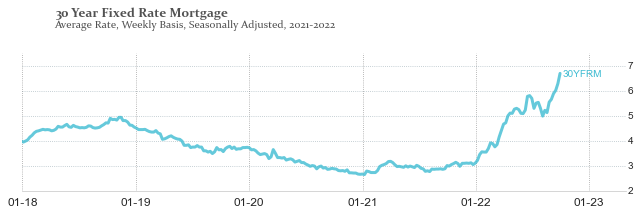

In [467]:
#two compare two values

fig, ax = plt.subplots(figsize=(9,3))

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.09, y=.935, s="30 Year Fixed Rate Mortgage", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.09, y=.885, s="Average Rate, Weekly Basis, Seasonally Adjusted, 2021-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
 
    #'#3EBCD2',

#set the lines with the dataset 
sns.lineplot(ax=ax, data=oer_plot, x="Week", y="Index", hue = "type1", palette = ['#3EBCD2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(oer_plot["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph



#plot grey area for recession information
#ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

plt.ylim([2, 7.5])

#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2018-01-01"), datetime.date.fromisoformat("2023-05-01")])

#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=300, bbox_inches='tight')
plt.show()

In [469]:
## Case Shiller Index --- shelter inflation
oer = fred.get_series('CSUSHPINSA')
oer.name = 'S&P/CS Index'

oer_plot = oer.to_frame()
oer_plot['Month'] = oer_plot.index
oer_plot.reset_index(drop=True, inplace=True)
oer_plot.dropna(inplace=True)
oer_plot['type'] = 'S&P/CS'

oer_plot.columns = ['Index', 'Month', 'type1']

oer_plot

,Index,Month,type1
144,63.734,1987-01-01,S&P/CS
145,64.134,1987-02-01,S&P/CS
146,64.470,1987-03-01,S&P/CS
147,64.974,1987-04-01,S&P/CS
148,65.548,1987-05-01,S&P/CS
...,...,...,...
566,295.054,2022-03-01,S&P/CS
567,301.655,2022-04-01,S&P/CS
568,306.639,2022-05-01,S&P/CS
569,308.468,2022-06-01,S&P/CS


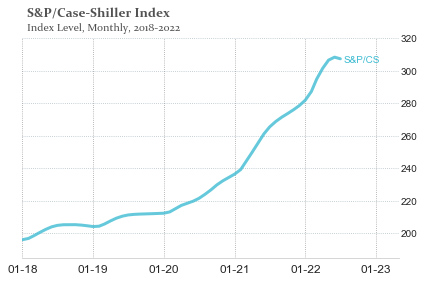

In [480]:
#two compare two values

fig, ax = plt.subplots()

#set fonds and grid
ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Constantia'}


#text and title
ax.text(x=0.07, y=.935, s="S&P/Case-Shiller Index", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8, **hfont)
ax.text(x=0.07, y=.885, s="Index Level, Monthly, 2018-2022", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8, **hfont)
 
    #'#3EBCD2',

#set the lines with the dataset 
sns.lineplot(ax=ax, data=oer_plot, x="Month", y="Index", hue = "type1", palette = ['#3EBCD2'], legend=None, 
            alpha=0.8, 
            linewidth=3)


#plot the names at the end of the line
for line, type1 in zip(ax.lines, sorted(set(oer_plot["type1"]))):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.55)


#style of the grid
plt.tight_layout()
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax.spines[['top','right','left']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12) 
ax.yaxis.set_tick_params(pad=-2,             # Pad tick labels so they don't go over y-axis
                         labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10)     
ax.set(xlabel=None)
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(ylabel=None)

#plot info inside of the graph



#plot grey area for recession information
#ax.axvspan('2020-02-01', '2020-04-01', alpha=0.5, color='grey')

#SOMETIMES, STUFF GETS MESSY AND ITS BETTER TO LIMIT THE X AND Y AXIS

plt.ylim([185, 320])

#note that to limit the x axis we use dates, not number as for the Y axis
plt.xlim([datetime.date.fromisoformat("2018-01-01"), datetime.date.fromisoformat("2023-05-01")])

#save the figure, and copy it to paste it in the slides
plt.savefig('filename.png', dpi=300, bbox_inches='tight')
plt.show()